In [57]:
import cv2
import matplotlib.pyplot as plt

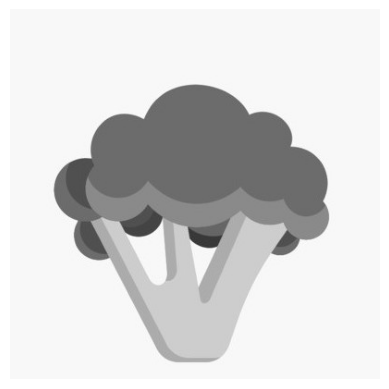

In [58]:
images=cv2.imread("C://Users/DELL/Downloads/veget.jpg",0)


gray_img=cv2.cvtColor(images,cv2.COLOR_BGR2RGB)



brocolli=cv2.imread("C://Users/DELL/Downloads/brocolli.jpg",0)


gray_brocolli=cv2.cvtColor(brocolli,cv2.COLOR_BGR2RGB)


apple=cv2.imread("C://Users/DELL/Downloads/apple.jpg",0)


gray_apple=cv2.cvtColor(apple,cv2.COLOR_BGR2RGB)

plt.imshow(gray_img) #original colored image 

plt.axis(False)




plt.imshow(gray_apple) ## this is the fruit template

plt.imshow(gray_brocolli) ## this is vegetable template



400.0


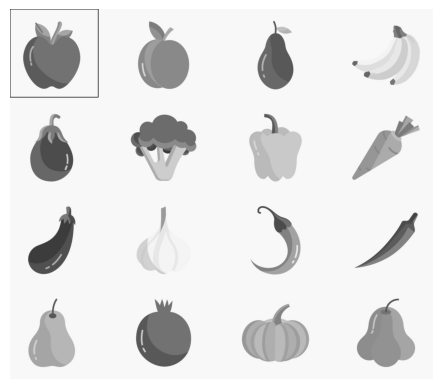

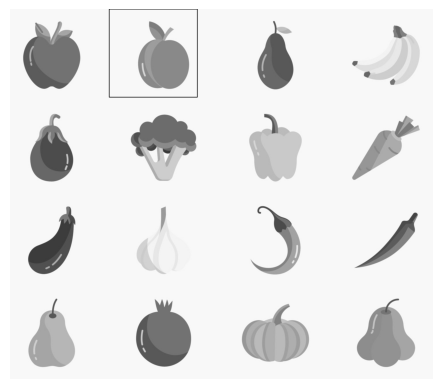

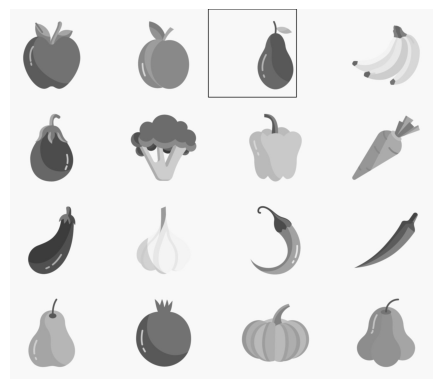

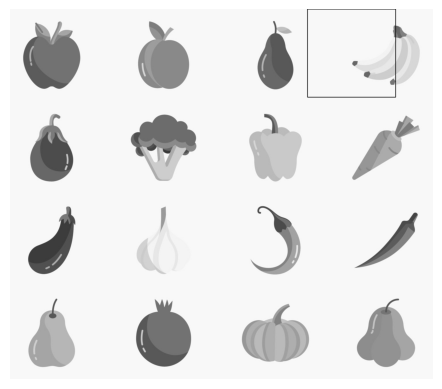

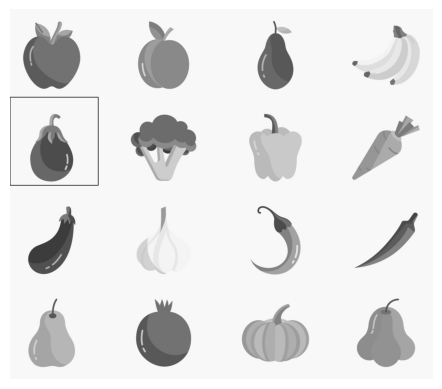

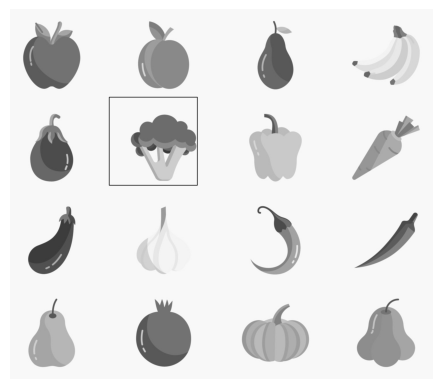

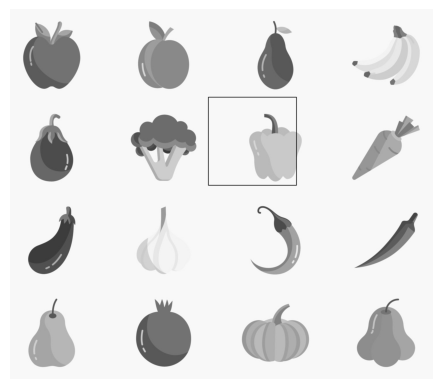

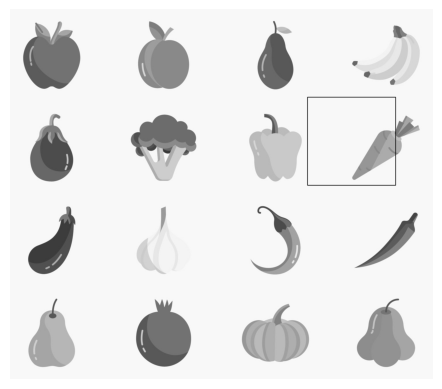

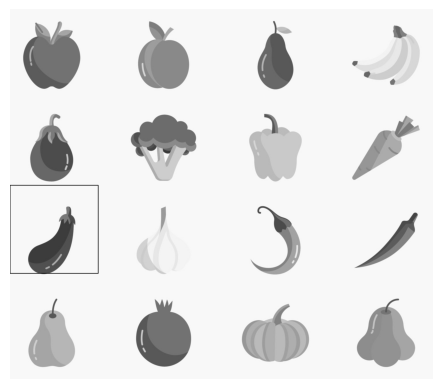

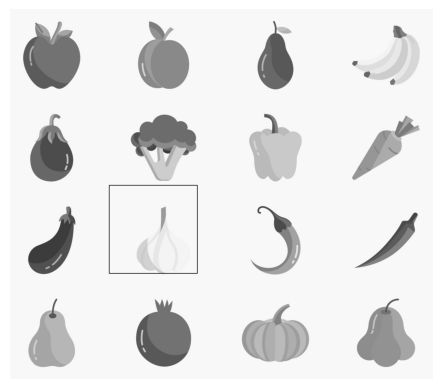

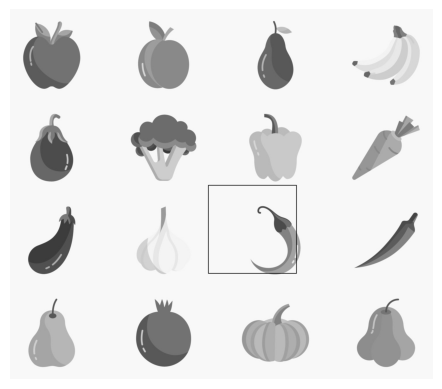

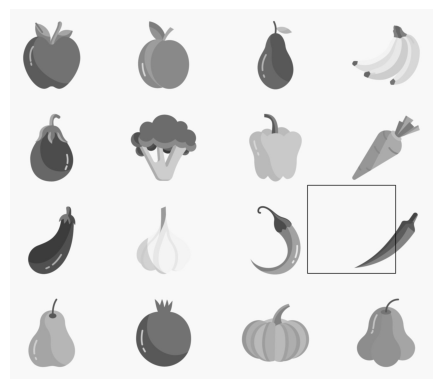

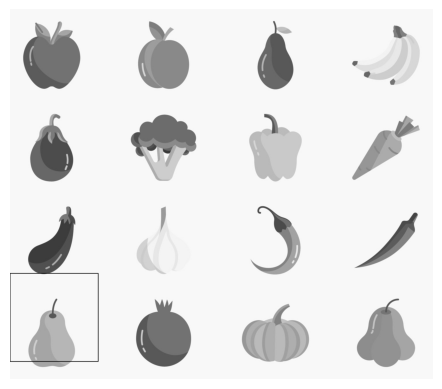

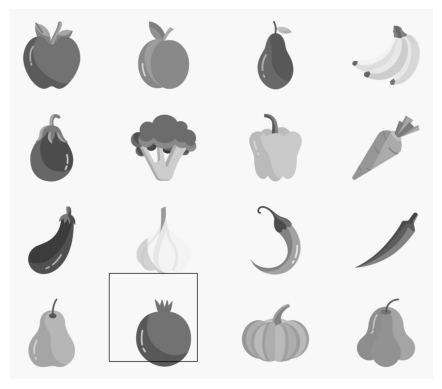

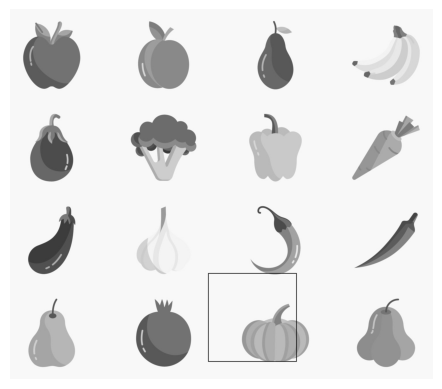

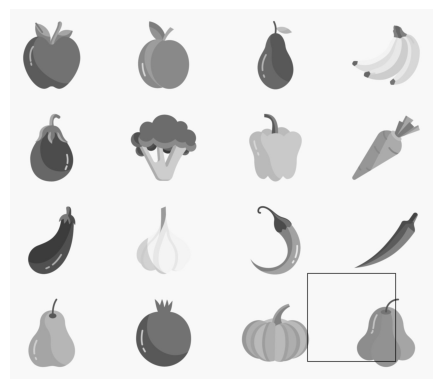

[(0.3306375, (0, 0)), (85.2991125, (450, 0)), (96.83038125, (900, 0)), (90.044475, (1350, 0)), (129.32025, (0, 400)), (124.97934375, (450, 400)), (154.90355625, (900, 400)), (90.72845625, (1350, 400)), (110.66068125, (0, 800)), (85.14159375, (450, 800)), (116.5863375, (900, 800)), (81.02214375, (1350, 800)), (96.62165625, (0, 1200)), (66.54774375, (450, 1200)), (122.59719375, (900, 1200)), (162.96721875, (1350, 1200))]


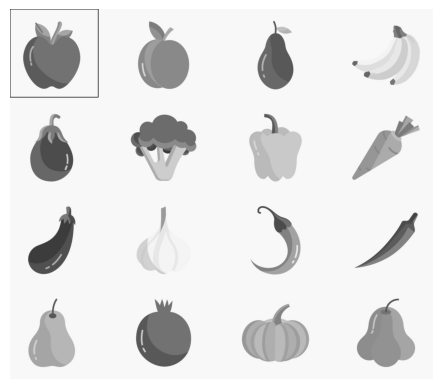

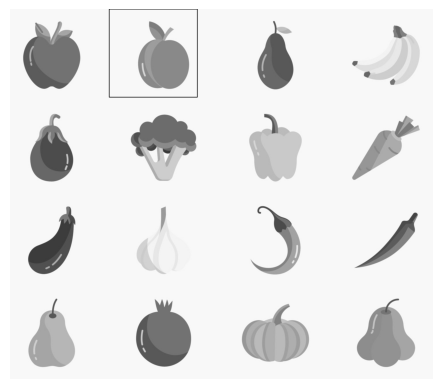

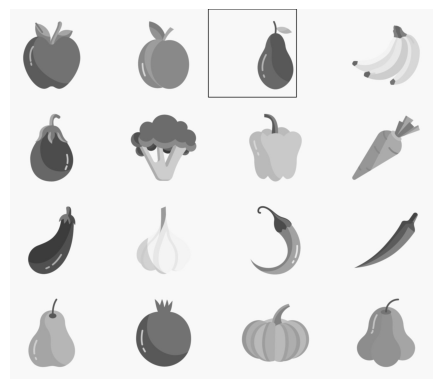

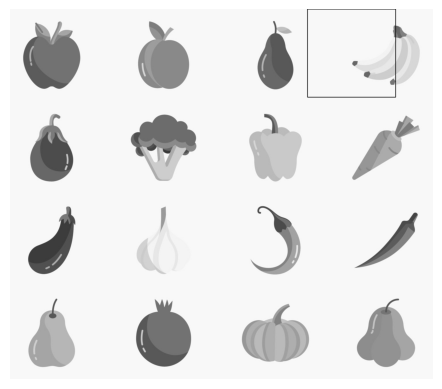

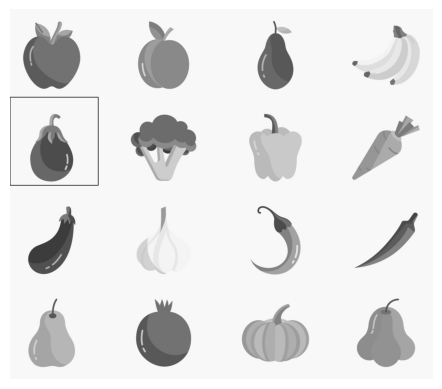

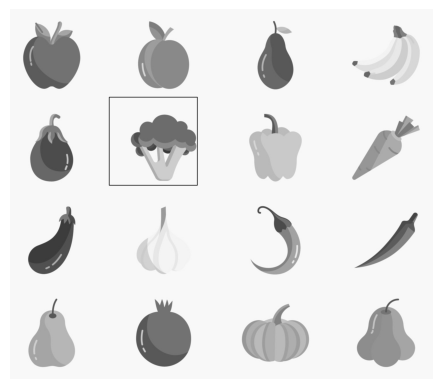

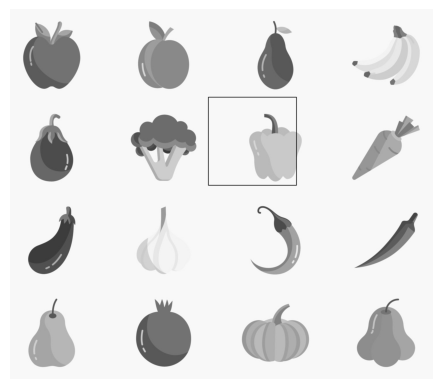

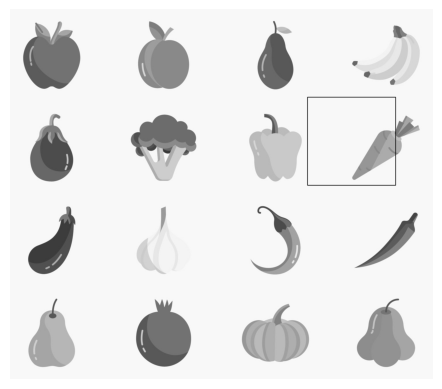

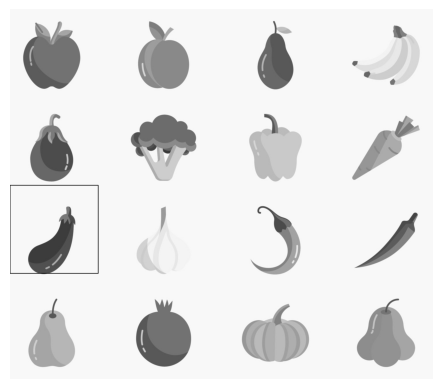

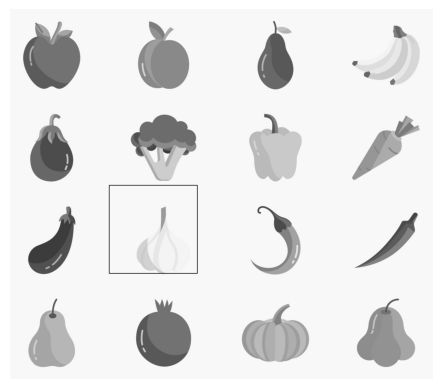

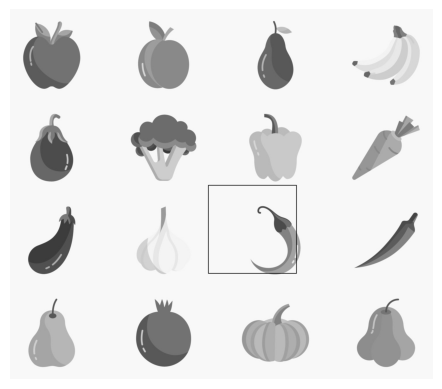

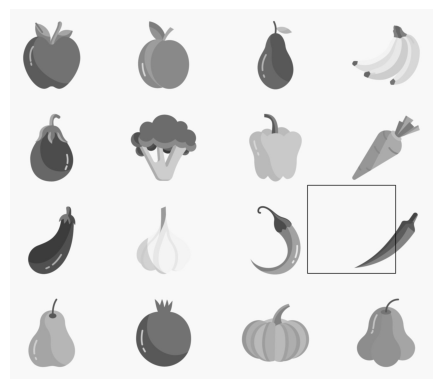

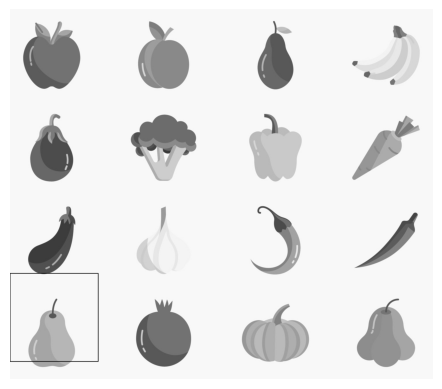

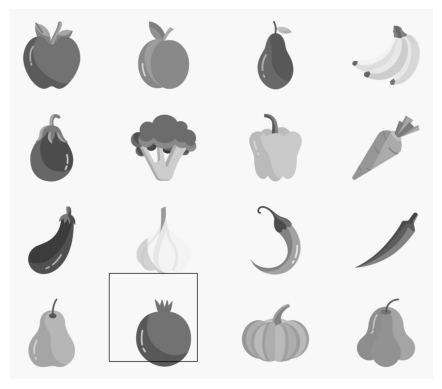

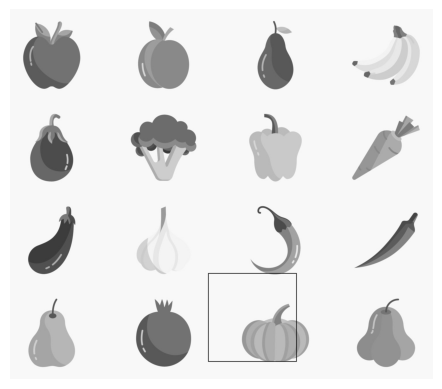

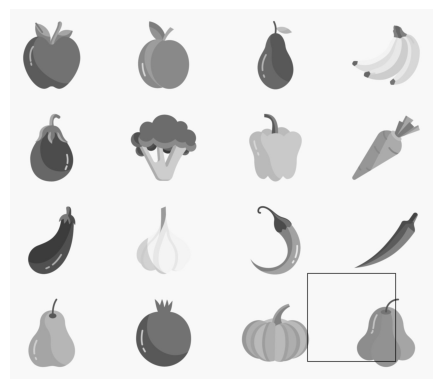

[(110.9189625, (0, 0)), (110.5279125, (450, 0)), (135.75328125, (900, 0)), (140.135175, (1350, 0)), (121.3000875, (0, 400)), (99.71630625, (450, 400)), (181.70998125, (900, 400)), (149.79058125, (1350, 400)), (118.39329375, (0, 800)), (140.42795625, (450, 800)), (158.7711375, (900, 800)), (135.46246875, (1350, 800)), (148.16023125, (0, 1200)), (125.32006875, (450, 1200)), (173.83321875, (900, 1200)), (198.20266875, (1350, 1200))]


In [63]:
import numpy as np
stepSize_col=(gray_img.shape[1]/apple.shape[1])
stepSize_col=gray_img.shape[1]/stepSize_col

stepSize_row=(gray_img.shape[0]/apple.shape[0])
stepSize_row=gray_img.shape[0]/stepSize_row

print(stepSize_row)
windowSize=(400,400)




def image_comparisons(image1,image2):
    return np.sum((image2-image1)**2)/(image1.shape[0]*image2.shape[1])




def template_matching(image,template,stepSize_col:int,stepSize_row:int,windowSize):
    stepSize_col=abs(stepSize_col) # just to ensure i get a postive integer for stepsize
    stepSize_row=abs(stepSize_row)

    height=windowSize[0]
    width=windowSize[1]

    

    results_list=[] 



    for i in range(0,image.shape[0]-height,stepSize_row):      
        for j in range(0,image.shape[1]-width,stepSize_col):

            copied=image.copy()

        

           

            window=copied[i:i+height,j:j+width]

            if window.shape[0]!=height or window.shape[1]!=width:
                continue

            mse=image_comparisons(window,template)

           

            results_list.append((mse,(j,i)))


            cv2.rectangle(copied,(j,i),(j+height,i+width),0,2)
            plt.imshow(copied)
            plt.axis(False)           
            plt.pause(0.01)
            
            
    print(results_list)
    results_list.sort()
    
    return results_list
apple_match=template_matching(gray_img,gray_apple,int(stepSize_col)+50,int(stepSize_row),windowSize)
brocolli_match=template_matching(gray_img,gray_brocolli,int(stepSize_col)+50,int(stepSize_row),windowSize)


           


           
    



In [64]:
display(apple_match)


brocolli_match

[(0.3306375, (0, 0)),
 (66.54774375, (450, 1200)),
 (81.02214375, (1350, 800)),
 (85.14159375, (450, 800)),
 (85.2991125, (450, 0)),
 (90.044475, (1350, 0)),
 (90.72845625, (1350, 400)),
 (96.62165625, (0, 1200)),
 (96.83038125, (900, 0)),
 (110.66068125, (0, 800)),
 (116.5863375, (900, 800)),
 (122.59719375, (900, 1200)),
 (124.97934375, (450, 400)),
 (129.32025, (0, 400)),
 (154.90355625, (900, 400)),
 (162.96721875, (1350, 1200))]

[(99.71630625, (450, 400)),
 (110.5279125, (450, 0)),
 (110.9189625, (0, 0)),
 (118.39329375, (0, 800)),
 (121.3000875, (0, 400)),
 (125.32006875, (450, 1200)),
 (135.46246875, (1350, 800)),
 (135.75328125, (900, 0)),
 (140.135175, (1350, 0)),
 (140.42795625, (450, 800)),
 (148.16023125, (0, 1200)),
 (149.79058125, (1350, 400)),
 (158.7711375, (900, 800)),
 (173.83321875, (900, 1200)),
 (181.70998125, (900, 400)),
 (198.20266875, (1350, 1200))]

In [67]:
apple_pt=apple_match[0][1][0] ## taking any element of the (x,y) tuple  since the template is square

broccolli_pt=brocolli_match[0][1][0]



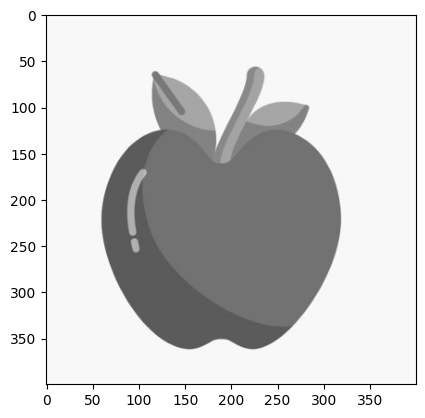

In [ ]:
plt.imshow(gray_img[apple_pt:apple_pt+400,apple_pt:apple_pt+400])



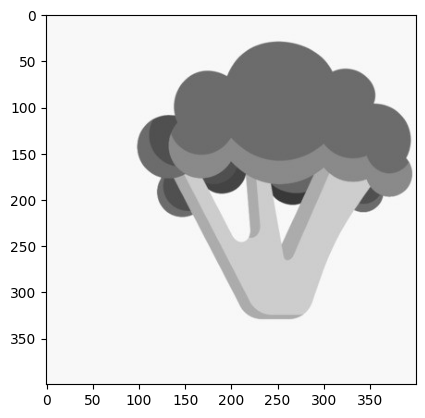

In [69]:
plt.imshow(gray_img[broccolli_pt:broccolli_pt+400,broccolli_pt:broccolli_pt+400])

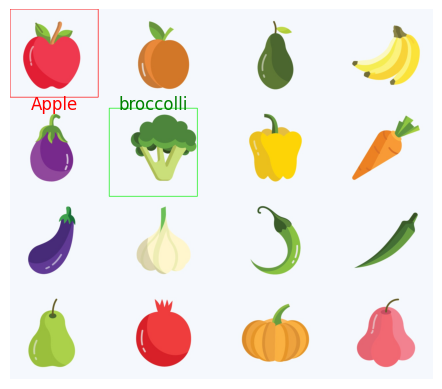

In [89]:
colored_img=cv2.imread("C://Users/DELL/Downloads/veget.jpg")


colored_img=cv2.cvtColor(colored_img,cv2.COLOR_BGR2RGB)


cv2.rectangle(colored_img,(apple_pt,apple_pt),(apple_pt+400,apple_pt+400),(255,0,0),2)



cv2.rectangle(colored_img,(broccolli_pt,broccolli_pt),(broccolli_pt+400,broccolli_pt+400),(0,240,0),2)


plt.imshow(colored_img)
plt.text(200, 470, "Apple", fontsize=12, ha='center', va='bottom', color='red') #apple text

plt.text(650, 470, "broccolli", fontsize=12, ha='center', va='bottom', color='green') #broccolli text



plt.axis(False)

plt.savefig("C://Users/DELL/Downloads/new_vegetables.jpg")
